In [2]:
%reset -f
%matplotlib inline

In [3]:
from pathlib import Path
import os
import pandas as pd
import cv2
from PIL import Image
rootPath = Path("D:/kelp")

In [4]:
train_folder = os.path.join(rootPath, "train_satellite")
label_folder = os.path.join(rootPath, "train_kelp")
test_folder = os.path.join(rootPath, "test_satellite")

In [5]:
meta_data = pd.read_csv(os.path.join(rootPath, "metadata_fTq0l2T.csv"))

In [6]:
meta_data.head(5)

,tile_id,filename,md5_hash,filesize_bytes,type,in_train
0,JW725114,JW725114_satellite.tif,97b19f0747260df89e23f33caced3632,1105392,satellite,True
1,UX493605,UX493605_satellite.tif,fbdd888f115ede68ee83996071c007dc,1270901,satellite,True
2,OU500661,OU500661_satellite.tif,2003e7d0eaf10894e796721b5d344eeb,1238008,satellite,True
3,DC227980,DC227980_satellite.tif,8498ccaff72b8d7cfcc7f9404baf36f2,1252483,satellite,True
4,SS602790,SS602790_satellite.tif,525618743f94a065158f432bd5ee2d32,1535964,satellite,True


In [7]:
train_image_list = []
train_mask_list = []
predict_image_list = []

for index, row in meta_data.iterrows():
    filename = row['filename']
    if row["in_train"] == True and row["type"] == "satellite":
        train_image_list.append(filename)
    elif row["in_train"] == False and row["type"] == "kelp":
        train_mask_list.append(filename)
    else:
        predict_image_list.append(filename)

In [8]:
train_image_list.sort()
train_mask_list.sort()
predict_image_list.sort()

In [9]:
from pacKage import *

device is cuda


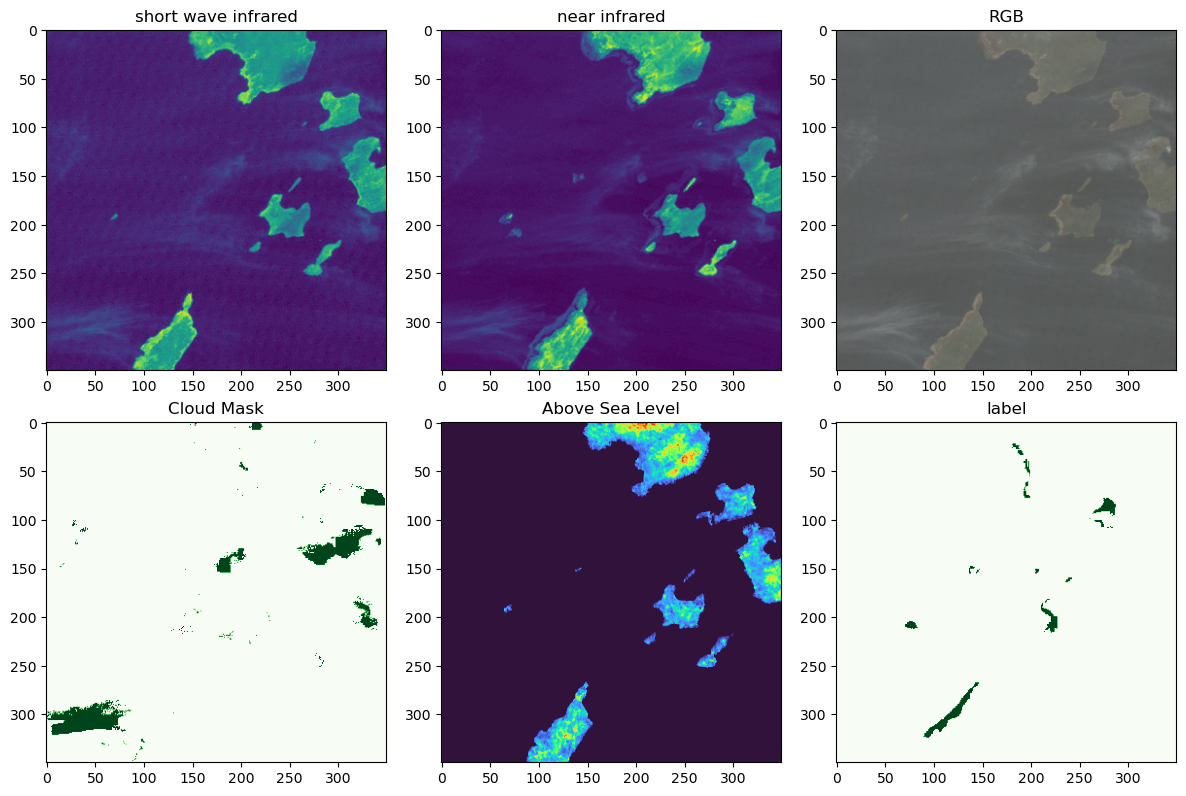

In [12]:
label_list = ["short wave infrared", "near infrared", "RGB", "Cloud Mask", "Above Sea Level","label"]
i = 8  # 5, 8
with tiff.TiffFile(glob(train_folder + "\\*")[i]) as temp1:
    temp1 = temp1.asarray()
with tiff.TiffFile(glob(label_folder + "\\*")[i]) as temp2:
    temp2 = temp2.asarray()
    
temp1 = np.clip((temp1 - np.min(temp1)) / (np.max(temp1) - np.min(temp1)), 0, 1)
temp2 = np.clip((temp2 - np.min(temp2)) / (np.max(temp2) - np.min(temp2)), 0, 1)

fig, axes = plt.subplots(2,3,  figsize=(12, 8))    
axes[0,0].imshow(temp1[:,:,0])
axes[0,0].set_title(f"{label_list[0]}")

axes[0,1].imshow(temp1[:,:,1])
axes[0,1].set_title(f"{label_list[1]}")

axes[0,2].imshow(temp1[:,:,2:5])
axes[0,2].set_title(f"{label_list[2]}")

axes[1,0].imshow(temp1[:,:,5], cmap = "Greens")
axes[1,0].set_title(f"{label_list[3]}")

axes[1,1].imshow(temp1[:,:,6], cmap = "turbo")
axes[1,1].set_title(f"{label_list[4]}")

axes[1,2].imshow(temp2[:,:], cmap = "Greens")
axes[1,2].set_title(f"{label_list[5]}")
plt.tight_layout()
plt.show()

cloud mask is usually binary, the same as label

In [70]:
np.unique(temp1[:,:,5])

array([0.00000000e+00, 3.49076692e-05])

In [88]:
np.unique(temp2)

array([0., 1.])

In [89]:
temp2

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

## then we can find that short wave infrared for the shallow, and near-infrared for the little bit deeper kelp

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


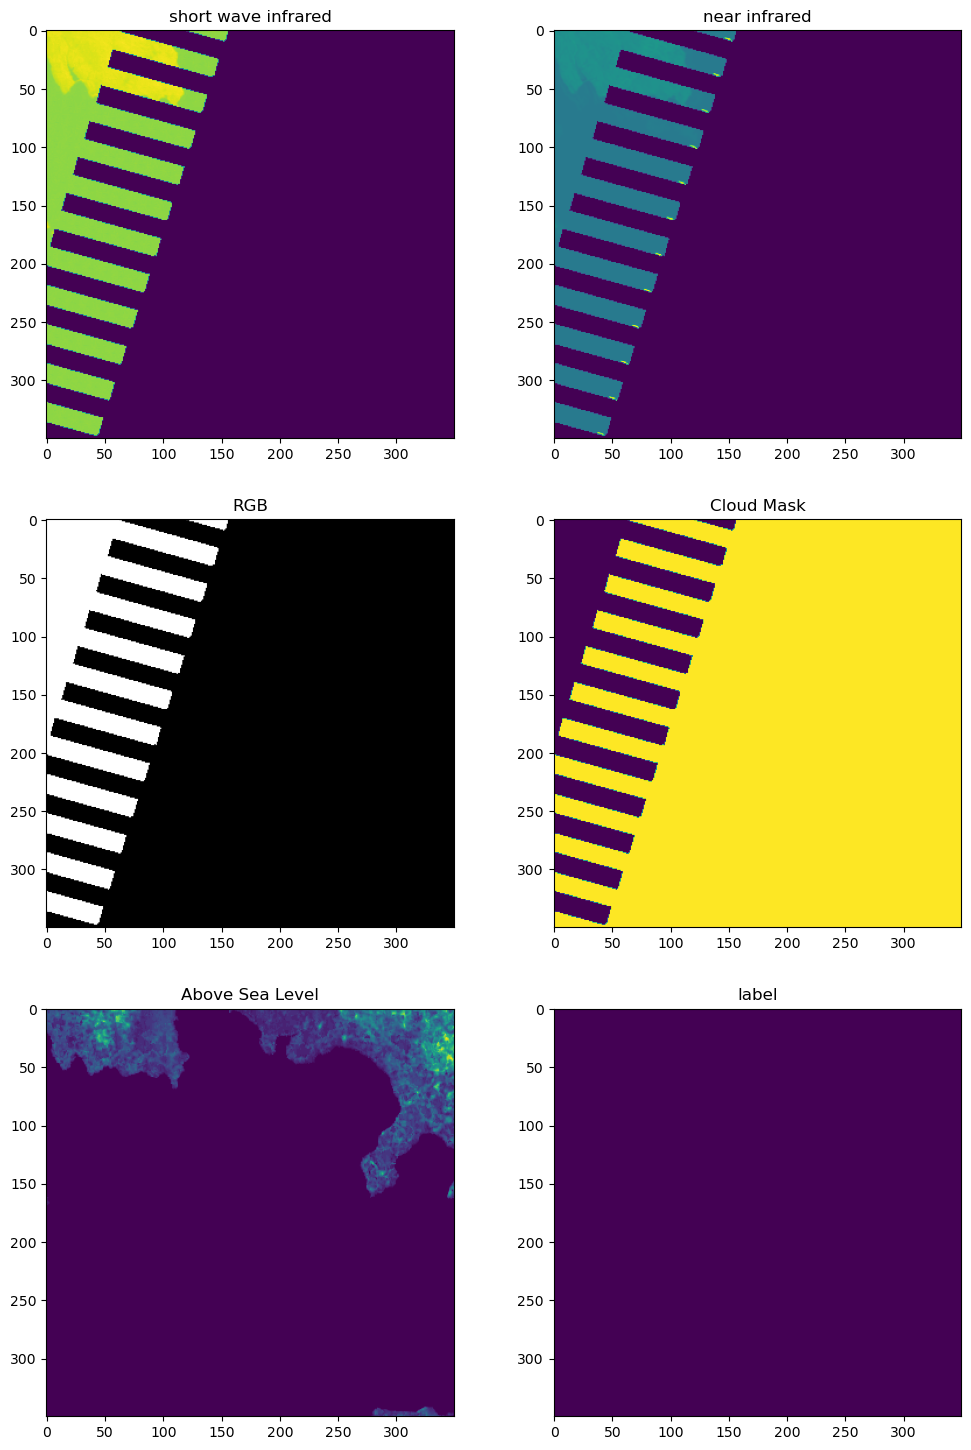

In [72]:
# Load the images as before
i = 15
with tiff.TiffFile(glob(train_folder + "\\*")[i]) as tif:
    temp1 = tif.asarray()
with tiff.TiffFile(glob(label_folder + "\\*")[i]) as tif:
    temp2 = tif.asarray()

# Min-Max normalization function
def normalize_image(image):
    return cv2.normalize(image, None, 0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_16F)

# Normalize images or channels as needed
normalized_images = [normalize_image(temp1[:,:,idx]) for idx in range(temp1.shape[2])]

# Create your subplots
fig, axes = plt.subplots(3, 2, figsize=(12, 18))

# Display the normalized images
axes[0,0].imshow(normalized_images[0])
axes[0,0].set_title(f"{label_list[0]}")

axes[0,1].imshow(normalized_images[1])
axes[0,1].set_title(f"{label_list[1]}")

# Assuming temp1[:,:,2:5] should be handled differently since it's RGB
# For RGB, normalization should be done before stacking if needed, or displayed directly if normalization isn't needed
axes[1,0].imshow(temp1[:,:,2:5])
axes[1,0].set_title(f"{label_list[2]}")

axes[1,1].imshow(normalized_images[5])
axes[1,1].set_title(f"{label_list[3]}")

axes[2,0].imshow(normalized_images[6])
axes[2,0].set_title(f"{label_list[4]}")

axes[2,1].imshow(temp2)
axes[2,1].set_title(f"{label_list[5]}")

plt.show()

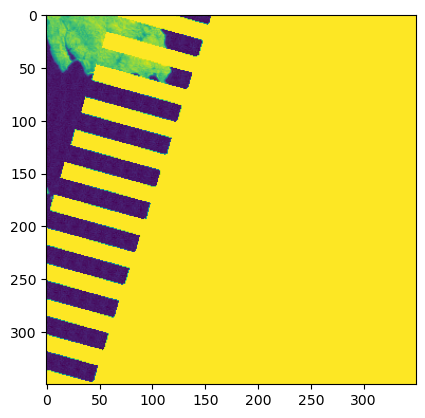

In [77]:
plt.imshow(normalized_images[0] + normalized_images[5])

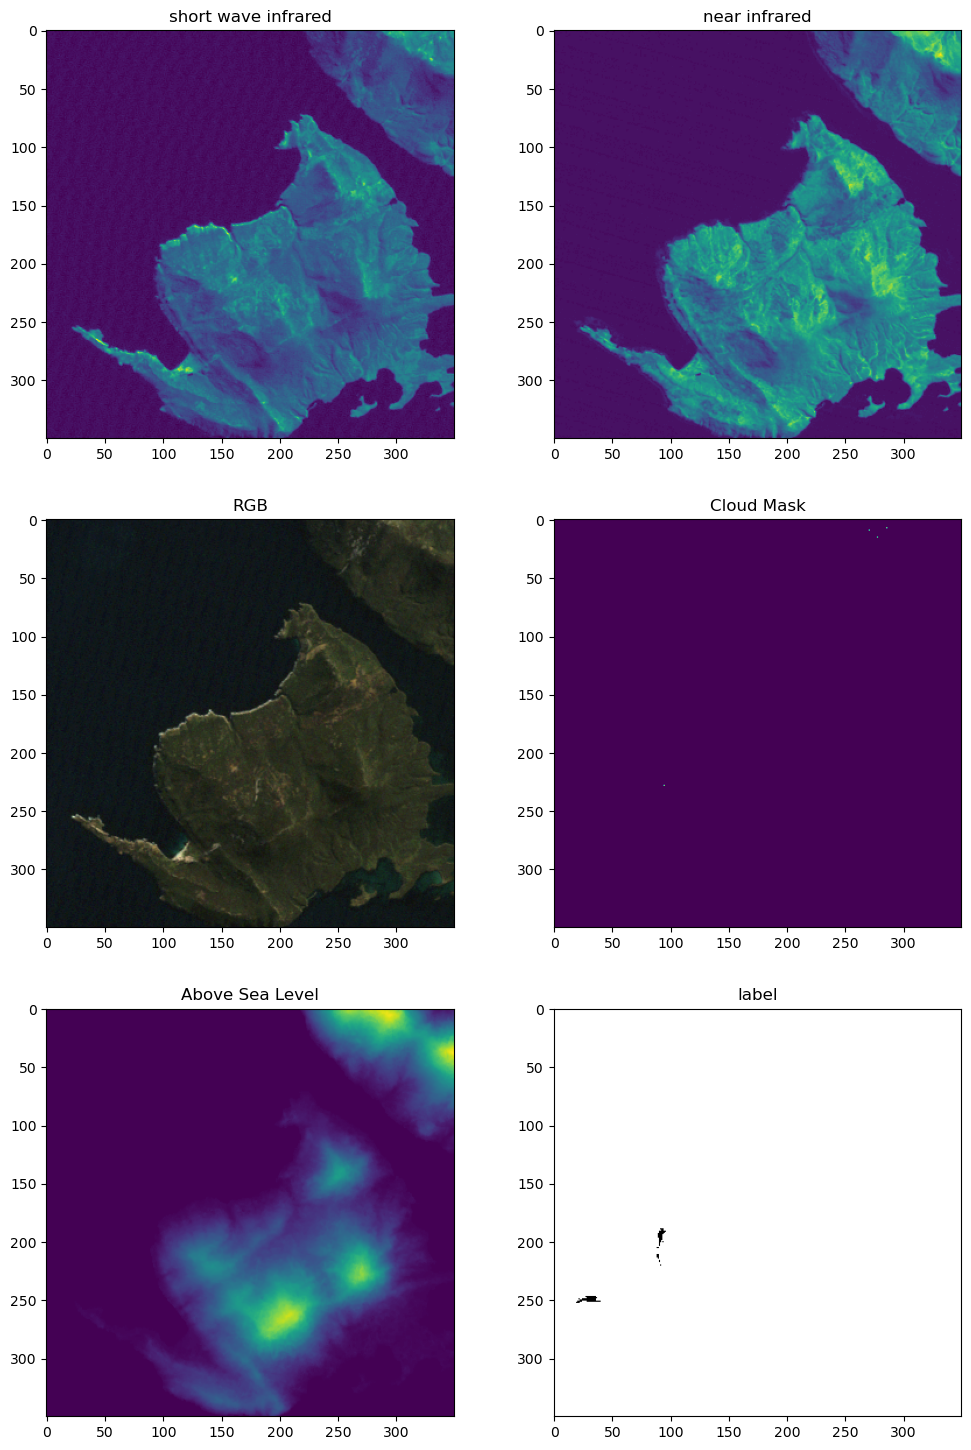

In [78]:
i = 36  # Example index
# Assuming train_dir and label_dir are correctly defined paths

# Load the images using TiffFile
with tiff.TiffFile(glob(train_folder + "\\*")[i]) as tif:
    temp1 = tif.asarray()
with tiff.TiffFile(glob(label_folder + "\\*")[i]) as tif:
    temp2 = tif.asarray()

# Min-Max normalization function
def normalize_image(image):
    return cv2.normalize(image, None, 0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_8U)

# Normalize the RGB channels of temp1
normalized_rgb = normalize_image(temp1[:,:,2:5])  # Corrected this line

# Normalize each channel separately if needed
normalized_images = [normalize_image(temp1[:,:,idx]) for idx in range(temp1.shape[2])]

# Now you can work with normalized_rgb and normalized_images as needed
fig, axes = plt.subplots(3, 2, figsize=(12, 18))

# Display the normalized images
axes[0,0].imshow(normalized_images[0])
axes[0,0].set_title(f"{label_list[0]}")

axes[0,1].imshow(normalized_images[1])
axes[0,1].set_title(f"{label_list[1]}")

# Assuming temp1[:,:,2:5] should be handled differently since it's RGB
# For RGB, normalization should be done before stacking if needed, or displayed directly if normalization isn't needed
axes[1,0].imshow(normalized_rgb)
axes[1,0].set_title(f"{label_list[2]}")

axes[1,1].imshow(normalized_images[5])
axes[1,1].set_title(f"{label_list[3]}")

axes[2,0].imshow(normalized_images[6])
axes[2,0].set_title(f"{label_list[4]}")

axes[2,1].imshow(temp2, cmap = "binary")
axes[2,1].set_title(f"{label_list[5]}")

plt.show()

### create an intersection of the graph between the label and the RGB